# <u>Methodologies II: Anomaly Detection</u>

### continuous_probabilistic_methods.py or continuous_probabilistic_methods.ipynb 1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from acquire import get_lemonade_data
from wrangle import get_lower_and_upper_bounds

from cycler import cycler
plt.rcParams["figure.figsize"] = (20,9)

plt.rcParams['axes.facecolor']='#FFF'
plt.rcParams['figure.facecolor']='white'
plt.rcParams['axes.prop_cycle'] = cycler(color=['g', 'r', 'b', 'y'])

### Get Data

In [2]:
df = get_lemonade_data()

In [3]:
df.head()

,date,day,temperature,rainfall,flyers,price,sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


#### (1). Using lemonade.csv dataset and focusing on continuous variables:

- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. 
    - Do these lower outliers make sense? 
    - Which outliers should be kept?
- Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. 
    - Do these upper outliers make sense? 
    - Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. 
    - Do these lower outliers make sense? 
    - Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. 
    - Do these upper outliers make sense? 
    - Which outliers should be kept?

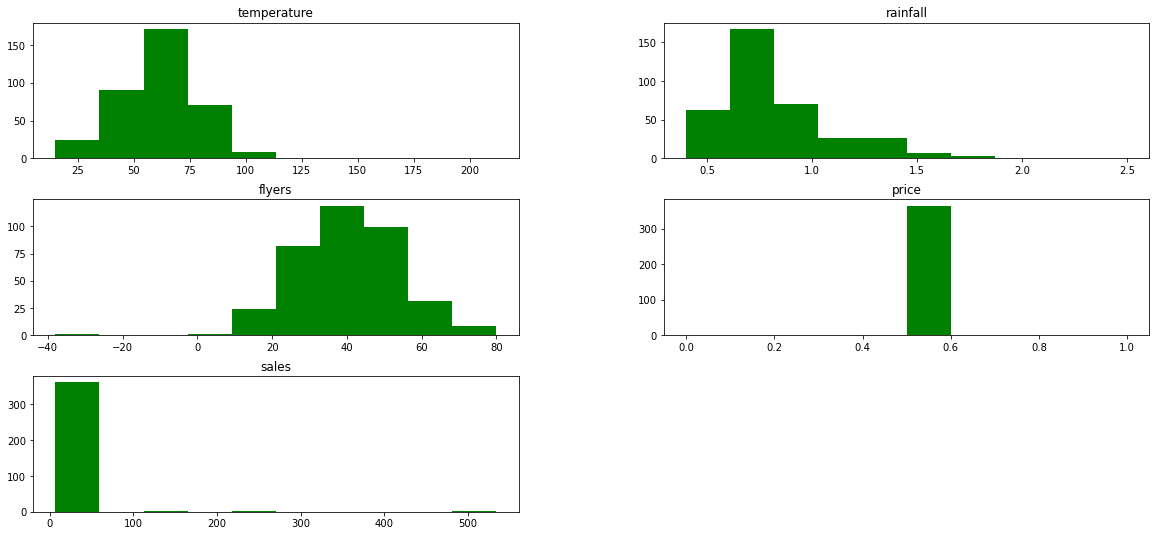

In [4]:
# Continuous var distribution

df.hist(grid = False)
None

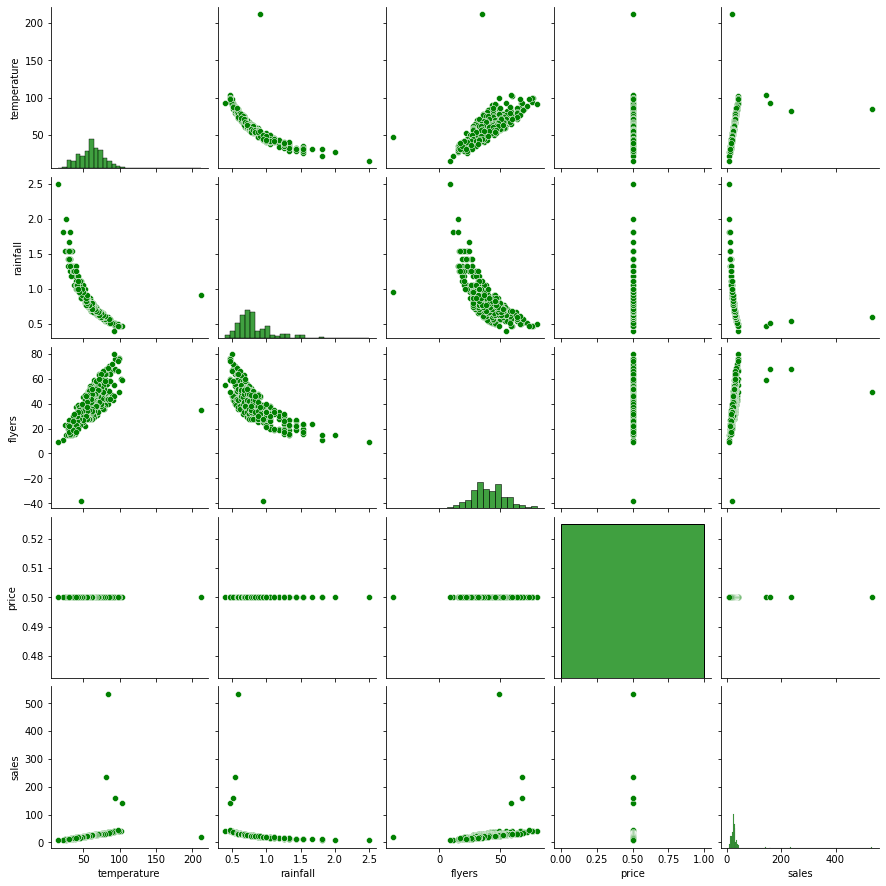

In [5]:
# Relations Plots
sns.pairplot(df)
None

### Call the lower-upper function to get the bounds


In [6]:
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        print(col)
        low_bound, up_bound = get_lower_and_upper_bounds(df[col], 1.5)
        print(f' Lower bound:---- {low_bound}\n Upper bound:---- {up_bound}\n')

    else:
        pass

temperature
 Lower bound:---- 16.700000000000003
 Upper bound:---- 104.7

rainfall
 Lower bound:---- 0.26
 Upper bound:---- 1.3

flyers
 Lower bound:---- 4.0
 Upper bound:---- 76.0

price
 Lower bound:---- 0.5
 Upper bound:---- 0.5

sales
 Lower bound:---- 5.0
 Upper bound:---- 45.0



#### (2). Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

- Use a 2 sigma decision rule to isolate the outliers.

    - Do these make sense?
    - Should certain outliers be kept or removed?

#### (3). Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv